In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [26]:
import tensorflow as tf
import random

In [17]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
cv2.namedWindow('Picture')
def nothing(x):
    pass
cv2.createTrackbar('Pos_Image', 'Picture',0,1,nothing)
cv2.createTrackbar('Neg_Image', 'Picture',0,1,nothing)
positive = np.array([])
negative = np.array([])
num_pos = 0
num_neg = 0
down = (28,28)
try:
    while(1):
        _, frame = cap.read()
        switch1 = cv2.getTrackbarPos('Pos_Image','Picture')
        switch2 = cv2.getTrackbarPos('Neg_Image','Picture')
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,down, interpolation = cv2.INTER_AREA)
        if switch1 == 1:
            positive = np.append(positive,gray)
            num_pos = num_pos + 1
        elif switch2 == 1:
            negative = np.append(negative,gray)
            num_neg = num_neg + 1
        cv2.imshow('Picture',gray)
        cv2.imshow('Original',frame)
        k = cv2.waitKey(5) & 0xFF
        if k == 27:
            break
except KeyboardInterrupt:
    cap.release()
    cv2.destroyAllWindows()

In [18]:
positive = positive.reshape(num_pos,down[0]*down[1])
negative = negative.reshape(num_neg,down[0]*down[1])
print positive.shape
print negative.shape

(170, 784)
(116, 784)


Positive 0


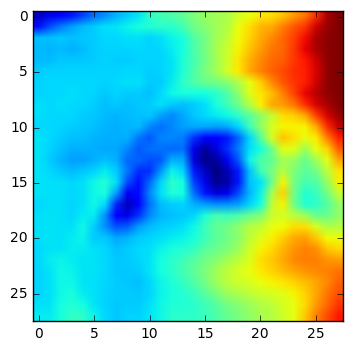

Positive 1


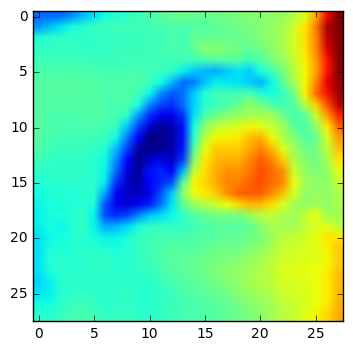

Positive 2


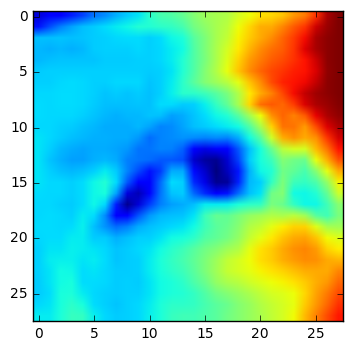

Positive 3


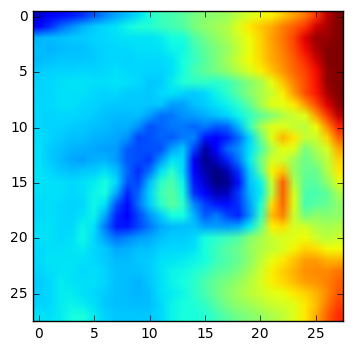

Positive 4


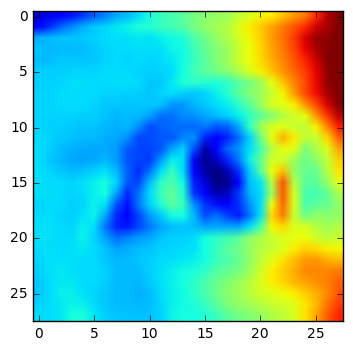

Positive 5


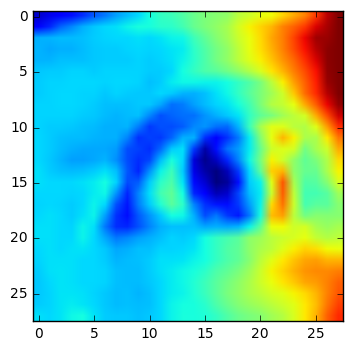

Positive 6


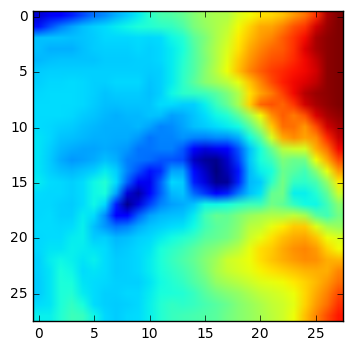

Positive 7


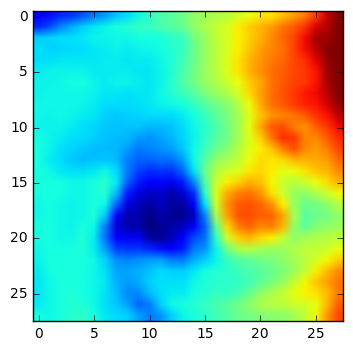

Positive 8


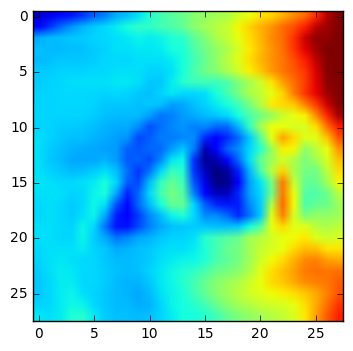

Positive 9


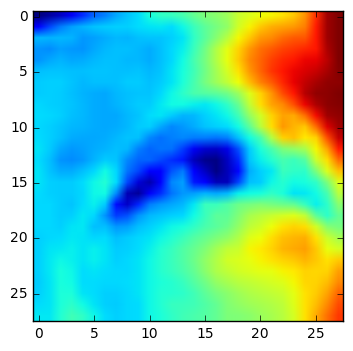

Negative 0


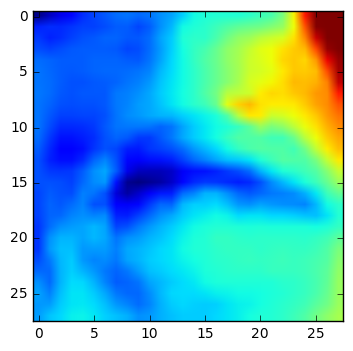

Negative 1


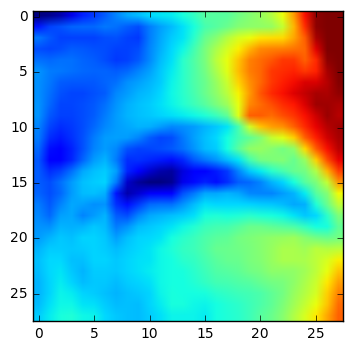

Negative 2


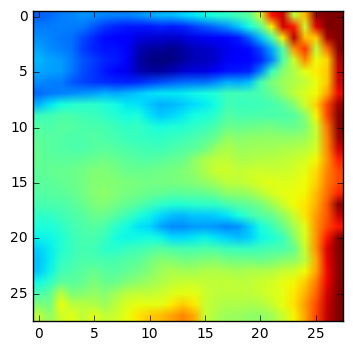

Negative 3


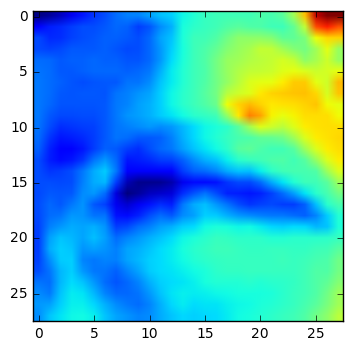

Negative 4


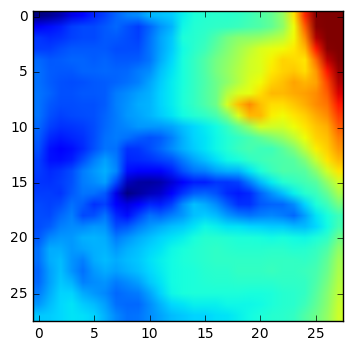

Negative 5


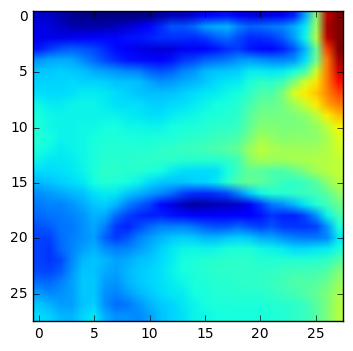

Negative 6


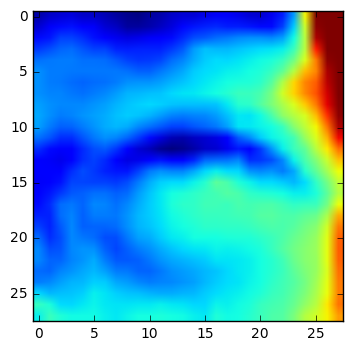

Negative 7


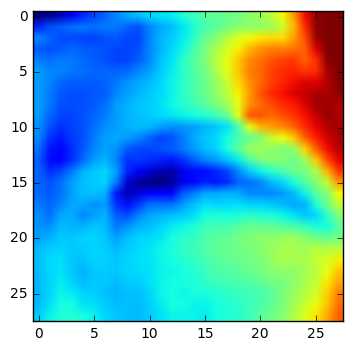

Negative 8


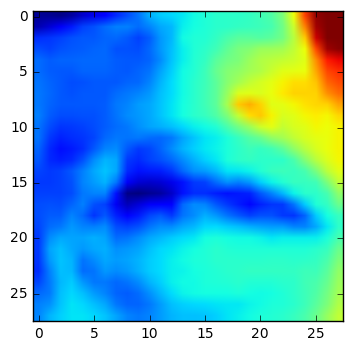

Negative 9


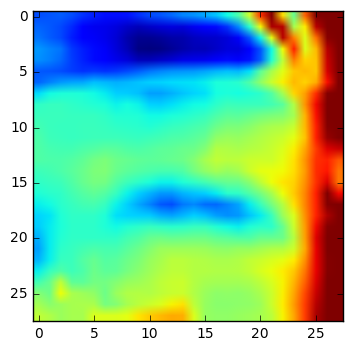

In [19]:
np.random.shuffle(positive)
np.random.shuffle(negative)
for i in xrange(0,10):
    print 'Positive',i
    imgplot = plt.imshow(positive[i,:].reshape((down[0],down[1])))
    plt.show()
for i in xrange(0,10):
    print 'Negative',i
    imgplot = plt.imshow(negative[i,:].reshape((down[0],down[1])))
    plt.show()

In [21]:
np.save('image_positive.npy',positive)
np.save('image_negative.npy',negative)

In [78]:
positive = np.load('image_positive.npy')
negative = np.load('image_negative.npy')

In [79]:
train = np.append(positive,negative)
train = train.reshape(positive.shape[0]+negative.shape[0],down[0]*down[1])
label_pos = np.array([])
for i in xrange(0, positive.shape[0]):
    label_pos = np.append(label_pos, np.array([1,0]))
label_pos = label_pos.reshape((positive.shape[0],2))
label_neg = np.array([])
for i in xrange(0,negative.shape[0]):
    label_neg = np.append(label_neg, np.array([0,1]))
label_neg = label_neg.reshape((negative.shape[0],2))
label = np.append(label_pos,label_neg).reshape(label_pos.shape[0]+label_neg.shape[0],2)

In [80]:
c = zip(train,label)
random.shuffle(c)
train = np.array([e[0] for e in c])
label = np.array([e[1] for e in c])
train = np.split(train,2); label = np.split(label,2)
train_x = train[0] #train_x
train_y = label[0] #train_y
test_x = train[1] #test_x
test_y = label[1] #test_y

for i in xrange(0,10):
    print train_y[i]
    imgplot = plt.imshow(train_x[i,:].reshape((down[0],down[1])))
    plt.show()

# 10 open; 01 close

In [100]:
# Parameters
learning_rate = 0.01
training_epochs = 400
#batch_size = 100
display_step = 10

# Network Parameters
n_hidden_1 = 25 # 1st layer num features
n_hidden_2 = 20 # 2nd layer num features
n_input = down[0]*down[1] # MNIST data input (img shape: 28*28)
n_classes = 2 # MNIST total classes (0-9 digits)

In [101]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [102]:
# Create model
def multilayer_perceptron(_X, _weights, _biases):
    #Hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1'])) 
    #Hidden layer with RELU activation
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, _weights['h2']), _biases['b2'])) 
    return tf.matmul(layer_2, weights['out']) + biases['out']

In [103]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [104]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [105]:
# Define loss and optimizer
# Softmax loss
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y)) 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred, dim=-1, name=None)) 
# Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [106]:
# Initializing the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [107]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        #total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        #for i in range(total_batch):
            #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
        sess.run(optimizer, feed_dict={x: train_x, y: train_y})
            # Compute average loss
        avg_cost += sess.run(cost, feed_dict={x: train_x, y:train_y})#/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)

    print "Optimization Finished!"

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    t1 = tf.cast(correct_prediction, "float").eval({x: test_x, y: test_y})
    t2 = tf.cast(correct_prediction, "float").eval({x: train_x, y: train_y})
    print "Train Accuracy:", accuracy.eval({x: train_x, y: train_y})
    print "Test Accuracy:", accuracy.eval({x: test_x, y: test_y})
    np.save('w1',(sess.run(weights['h1'])))
    np.save('w2', (sess.run(weights['h2'])))
    np.save('wout', (sess.run(weights['out'])))
    np.save('b1',(sess.run(biases['b1'])))
    np.save('b2',(sess.run(biases['b2'])))
    np.save('bout',(sess.run(biases['out'])))

Epoch: 0001 cost= 3560.174072266
Epoch: 0011 cost= 838.595764160
Epoch: 0021 cost= 195.353698730
Epoch: 0031 cost= 104.022880554
Epoch: 0041 cost= 52.944267273
Epoch: 0051 cost= 29.759601593
Epoch: 0061 cost= 25.626506805
Epoch: 0071 cost= 19.241470337
Epoch: 0081 cost= 15.452291489
Epoch: 0091 cost= 11.640861511
Epoch: 0101 cost= 7.693482399
Epoch: 0111 cost= 3.571425676
Epoch: 0121 cost= 0.429947764
Epoch: 0131 cost= 0.566506624
Epoch: 0141 cost= 1.373430371
Epoch: 0151 cost= 0.833137572
Epoch: 0161 cost= 0.064522177
Epoch: 0171 cost= 0.000000000
Epoch: 0181 cost= 0.000000000
Epoch: 0191 cost= 0.000000000
Epoch: 0201 cost= 0.000000000
Epoch: 0211 cost= 0.000000000
Epoch: 0221 cost= 0.000000000
Epoch: 0231 cost= 0.000000000
Epoch: 0241 cost= 0.000000000
Epoch: 0251 cost= 0.000000000
Epoch: 0261 cost= 0.000000000
Epoch: 0271 cost= 0.000000000
Epoch: 0281 cost= 0.000000000
Epoch: 0291 cost= 0.000000000
Epoch: 0301 cost= 0.000000000
Epoch: 0311 cost= 0.000000000
Epoch: 0321 cost= 0.00000

In [108]:
w1 = np.load('w1.npy')
w2 = np.load('w2.npy')
wout = np.load('wout.npy')
b1 = np.load('b1.npy')
b2 = np.load('b2.npy')
bout = np.load('bout.npy')

In [109]:
def neuralprocess(w1,w2,wout,b1,b2,bout,img):
    Input = img
    first = np.maximum((np.matmul(Input, w1)+b1),0)
    second = np.maximum((np.matmul(first, w2)+b2),0)
    output = (np.matmul(second, wout)+bout)
    return np.argmax(output) #0 open; 1 close

Predict:  1 ;Answer:  1


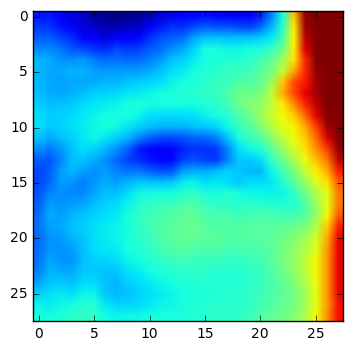

Predict:  0 ;Answer:  0


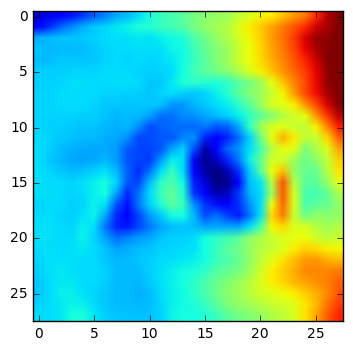

Predict:  1 ;Answer:  1


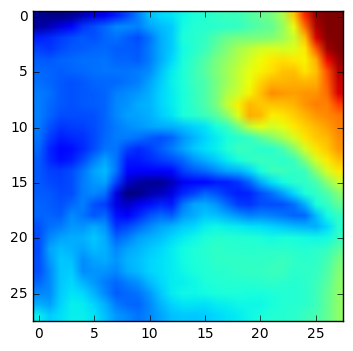

Predict:  0 ;Answer:  0


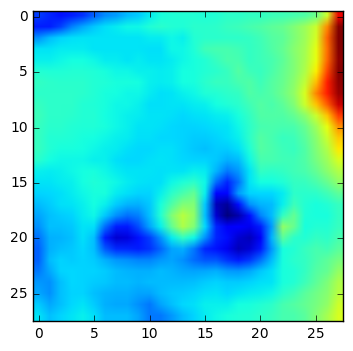

Predict:  1 ;Answer:  1


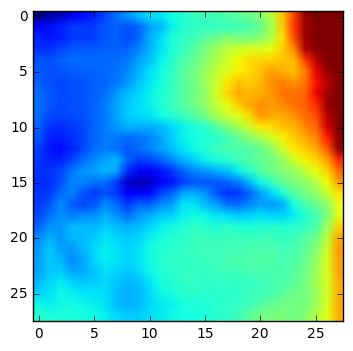

Predict:  0 ;Answer:  0


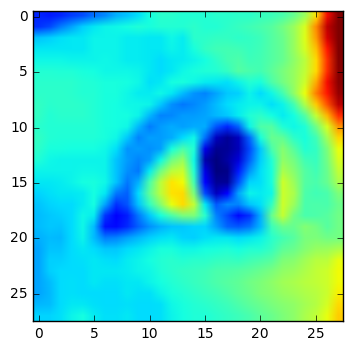

Predict:  0 ;Answer:  0


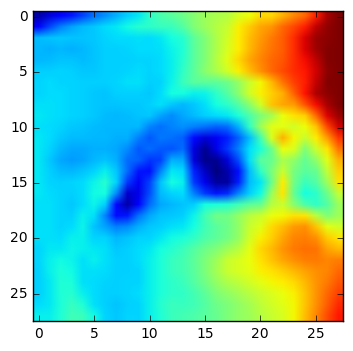

Predict:  0 ;Answer:  0


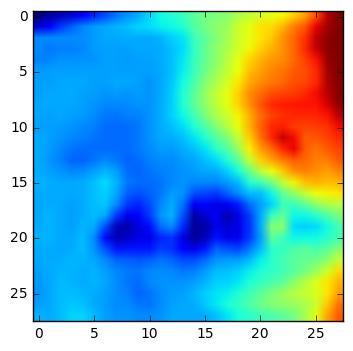

Predict:  0 ;Answer:  0


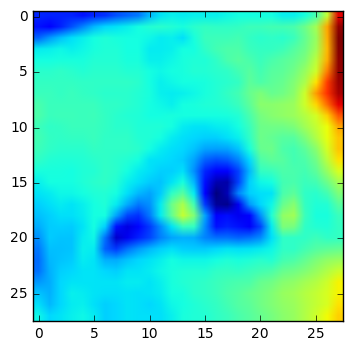

Predict:  0 ;Answer:  0


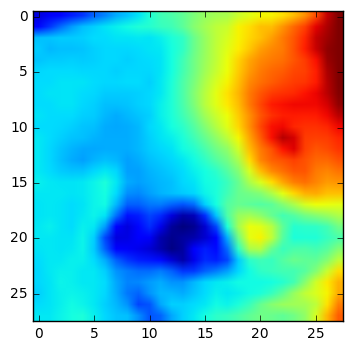

In [110]:
for i in xrange(0,10):
    print 'Predict: ',neuralprocess(w1,w2,wout,b1,b2,bout,test_x[i,:]),';Answer: ',np.argmax(test_y[i])
    imgplot = plt.imshow(test_x[i,:].reshape((down[0],down[1])))
    plt.show()